<h1>Midterm Exam - CHICAGO CRIMES DATA ANALYTICS PROJECT</h1>
<hr>
<h3>Analyst : Nerjie Angelo Mecantina</h3>

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [2]:
crimes['Date'] = crimes['Date'].astype(str)
crimes['Date'] = crimes['Date'].replace('/', '-') 
crimes['Date'] = crimes['Date'].str.strip() 
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst=True, errors='coerce')

crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mode()[0])
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mode()[0])
crimes['X Coordinate'] = crimes['X Coordinate'].fillna(crimes['X Coordinate'].mode()[0])
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna(crimes['Y Coordinate'].mode()[0])
crimes['Location Description'] = crimes['Location Description'].fillna('unknown_location')
crimes['Location'] = crimes['Location'].fillna(crimes['Location'].mode()[0])

crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] =  crimes['Date'].dt.month
crimes['Day'] =  crimes['Date'].dt.day
crimes['DayOfWeek'] =  crimes['Date'].dt.dayofweek
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          3
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
dtype: int64

In [3]:
crimes['Case Number'] = crimes['Case Number'].astype('category')
crimes['Block'] = crimes['Block'].astype('category')
crimes['IUCR'] = crimes['IUCR'].astype('category')
crimes['Primary Type'] = crimes['Primary Type'].astype('category')
crimes['Description'] = crimes['Description'].astype('category')
crimes['Location Description'] = crimes['Location Description'].astype('category')
crimes['FBI Code'] = crimes['FBI Code'].astype('category')
crimes['Updated On'] = crimes['Updated On'].astype('category')
crimes['Location'] = crimes['Location'].astype('category')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  category      
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  category      
 4   IUCR                  249123 non-null  category      
 5   Primary Type          249123 non-null  category      
 6   Description           249123 non-null  category      
 7   Location Description  249123 non-null  category      
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<h1>Exploratory Data Analytics</h1>
<hr>

# QUESTION 1: 
   # What are the top 5 most common Primary Types of crimes in the dataset?

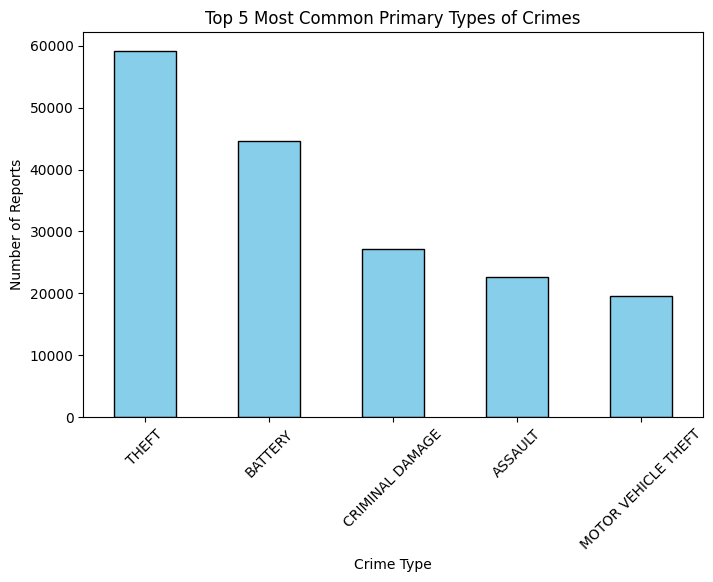

In [4]:
top_5 = crimes['Primary Type'].value_counts().head(5)

plt.figure(figsize=(8,5))
top_5.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Most Common Primary Types of Crimes")
plt.xlabel("Crime Type")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)
plt.show()

# INSIGHT: 
  The visualization shows that the most common crimes in Chicago are THEFT, BATTERY, CRIMINAL DAMAGE, ASSAULT, and MOTOR VEHICLE THEFT. with THEFT standing out as the most frequently reported.  
<hr>

# QUESTION 2:
# How do total crime counts vary by year?

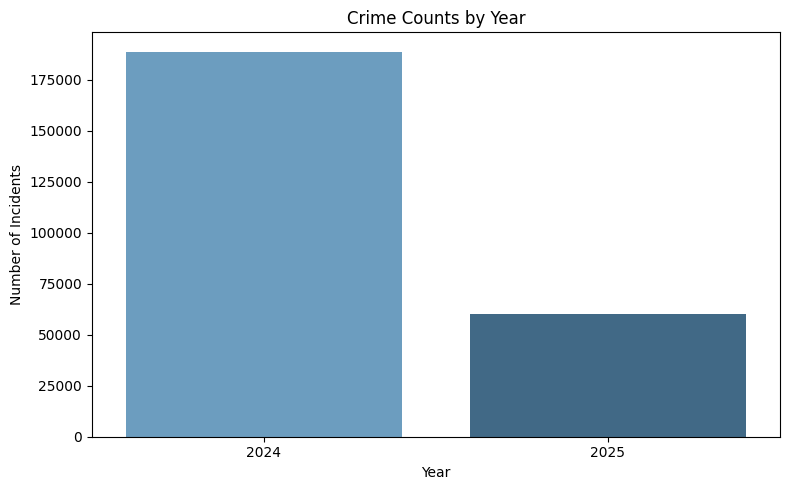

In [5]:
plt.figure(figsize=(8, 5))
year_counts = crimes['Year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, palette='Blues_d')
plt.title('Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# INSIGHT:
The majority of incidents occur in 2024 with a noticeable drop in 2025.
<HR></HR>

# QUESTION 3: 
# What is the monthly trend of crimes in 2024?

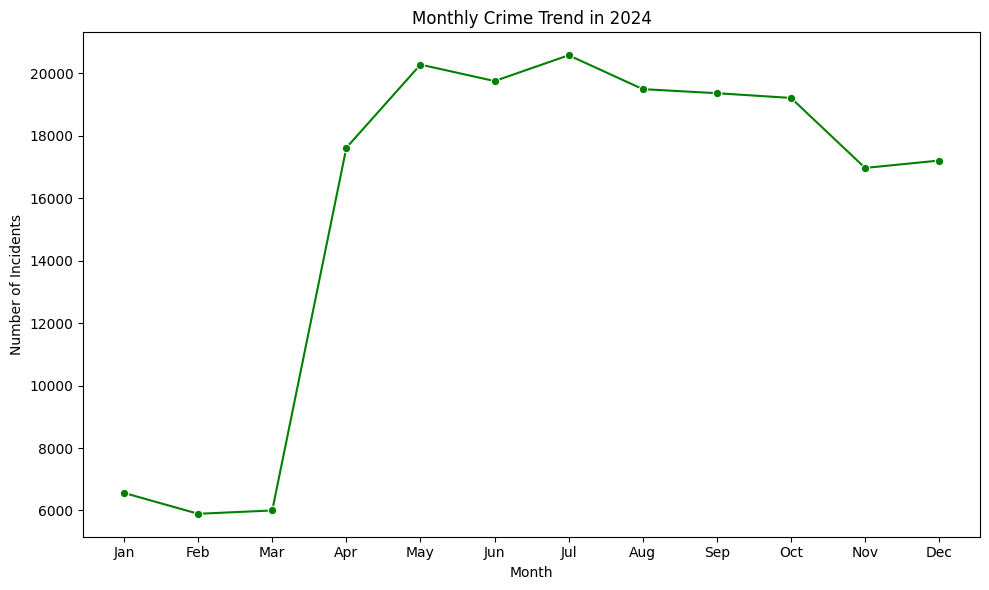

In [6]:
crimes_2024 = crimes[crimes['Year'] == 2024]
plt.figure(figsize=(10, 6))
monthly = crimes_2024['Month'].value_counts().sort_index()
sns.lineplot(x=monthly.index, y=monthly.values, marker='o', color='green')
plt.title('Monthly Crime Trend in 2024')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

# INSIGHT: 
Crimes show flexibility across months, with potential peaks in summer months of chicago suggesting seasonal influences on criminal activity.
<HR></HR>

# QUESTION 4: 
# Which community areas account for the largest share of crimes?

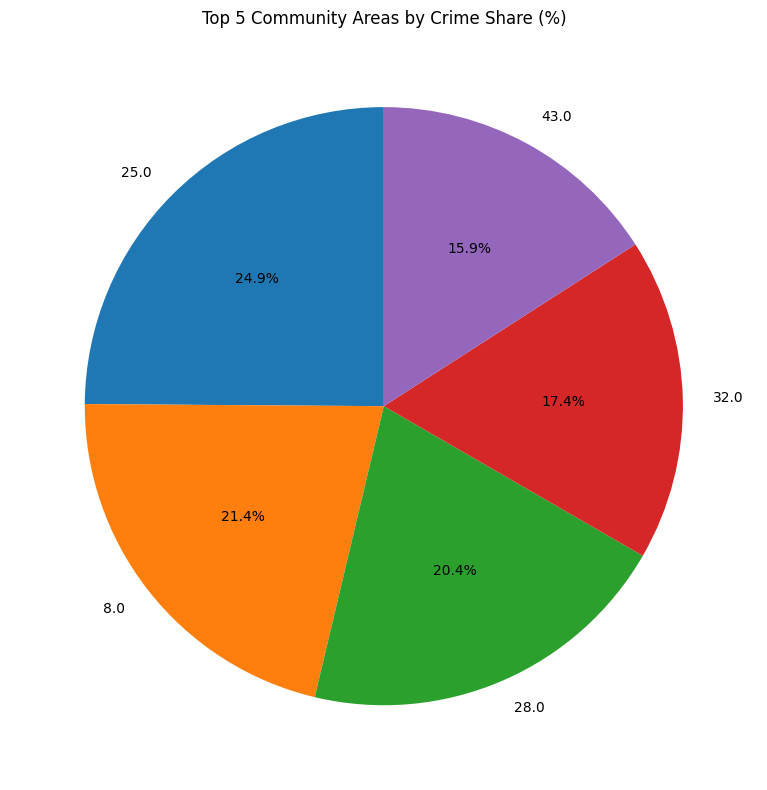

In [7]:
plt.figure(figsize=(8, 8))
top_5 = crimes['Community Area'].value_counts().head(5)
plt.pie(top_5.values, labels=top_5.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Community Areas by Crime Share (%)')
plt.tight_layout()
plt.show()

# INSIGHT:
Community Area 25 represents 24.9% of all crimes, highlighting it as a hotspot that could benefit from targeted resource allocation.
<HR></HR>

# QUESTION 5: 
# What percentage of crimes resulted in an arrest?

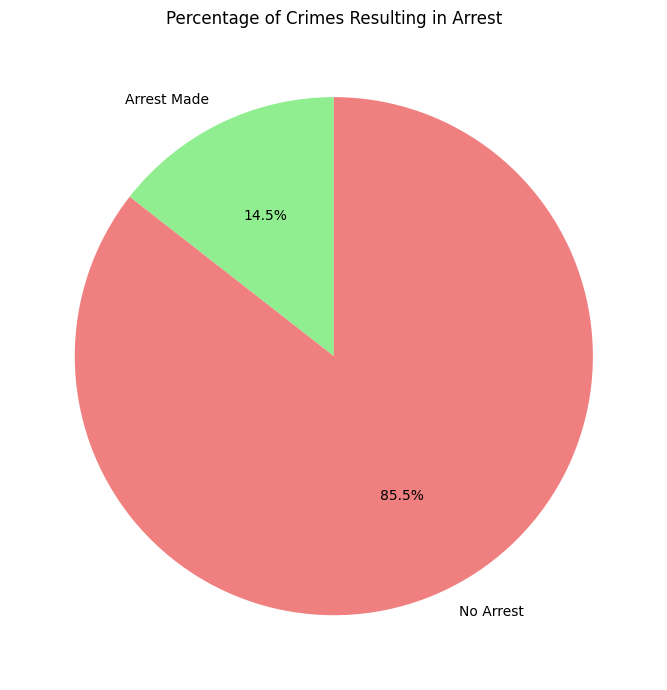

In [8]:
arrest = (crimes['Arrest'].sum() / len(crimes)) * 100
labels = ['Arrest Made', 'No Arrest']
sizes = [arrest, 100 - arrest]
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Percentage of Crimes Resulting in Arrest')
plt.tight_layout()
plt.show()

# INSIGHT:
Only 14.5% of incidents led to arrests underscoring challenges in detection and response times within the Chicago PD.
<HR></HR>

# QUESTION 6: 
# How do crime counts differ between domestic and non-domestic incidents?

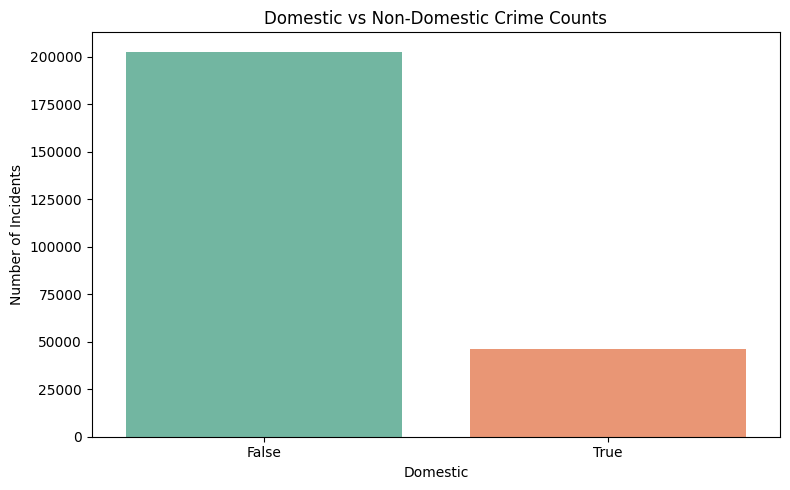

In [9]:
plt.figure(figsize=(8, 5))
domestic = crimes['Domestic'].value_counts()
sns.barplot(x=domestic.index.astype(str), y=domestic.values, palette='Set2')
plt.title('Domestic vs Non-Domestic Crime Counts')
plt.xlabel('Domestic')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# INSIGHT:
Non-domestic incidents far outnumber domestic ones, but the second may involve more sensitive, resource-intensive responses.
<HR></HR>

# QUESTION 7: 
# What are the top 5 location descriptions for crimes?

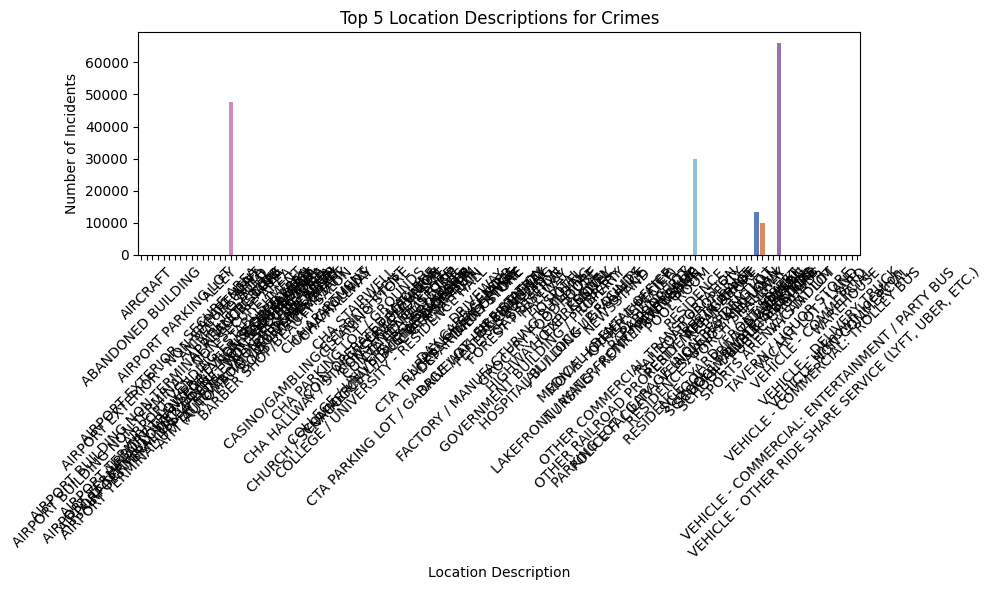

In [10]:
plt.figure(figsize=(10, 6))
top5_loc = crimes['Location Description'].value_counts().head(5)
sns.barplot(data=top5_loc.reset_index(), x='Location Description', y='count', palette='muted')
plt.title('Top 5 Location Descriptions for Crimes')
plt.xlabel('Location Description')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INSIGHT:
Streets account for 60,000+ emphasizing the need for street-level surveillance enhancements.
<HR></HR>

# QUESTION 8: 
# How are crimes distributed across police districts?

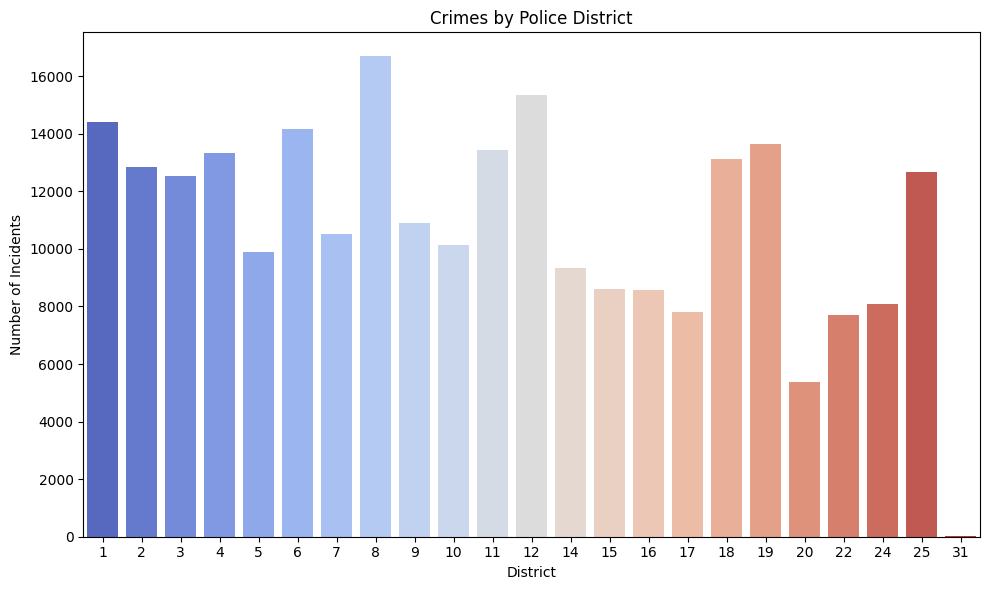

In [11]:
plt.figure(figsize=(10, 6))
district = crimes['District'].value_counts().sort_index()
sns.barplot(x=district.index, y=district.values, palette='coolwarm')
plt.title('Crimes by Police District')
plt.xlabel('District')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# INSIGHT
District 8 reports the highest at 16,000 incidents, suggesting disproportionate strain on resources in that area.
<HR></HR>

# QUESTION 9: 
# What is the geographic scatter of THEFT incidents?

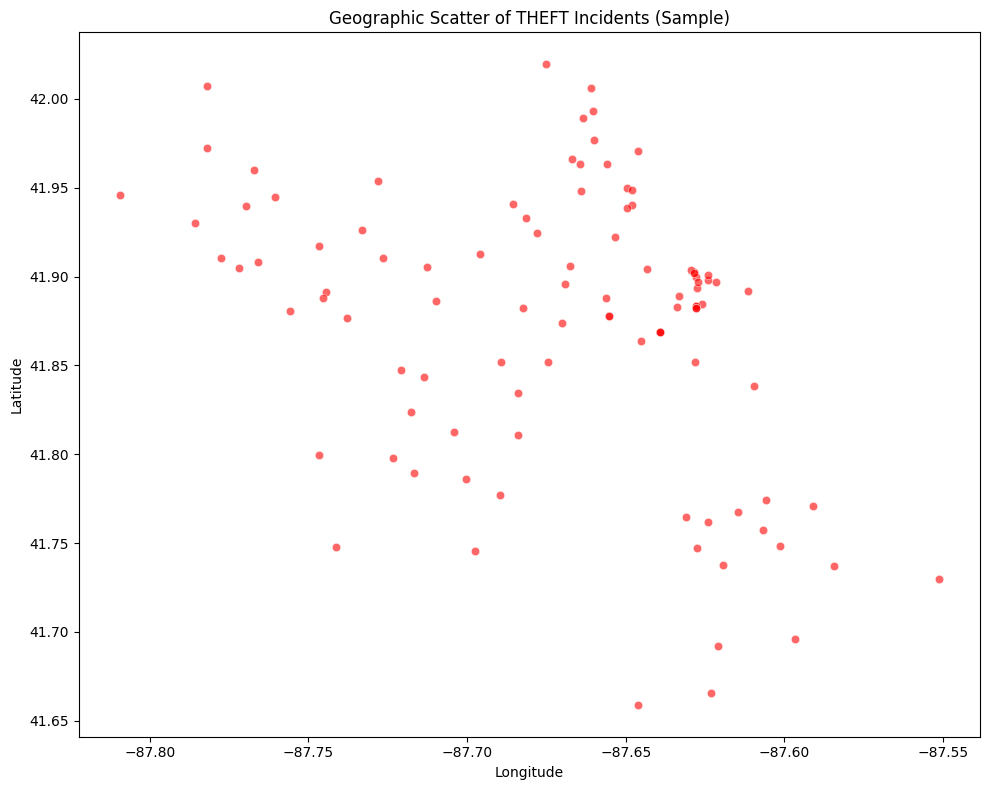

In [12]:
theft = crimes[crimes['Primary Type'] == 'THEFT'].sample(min(100, len(crimes[crimes['Primary Type'] == 'THEFT'])))
plt.figure(figsize=(10, 8))
sns.scatterplot(data=theft, x='Longitude', y='Latitude', alpha=0.6, color='red')
plt.title('Geographic Scatter of THEFT Incidents (Sample)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# INSIGHT
THEFTs cluster around central longitudes -87.65 to -87.60 indicating urban core vulnerability in Chicago's south and west sides.
<HR></HR>

# QUESTION 10: 
# Top 5 FBI Codes by frequency?

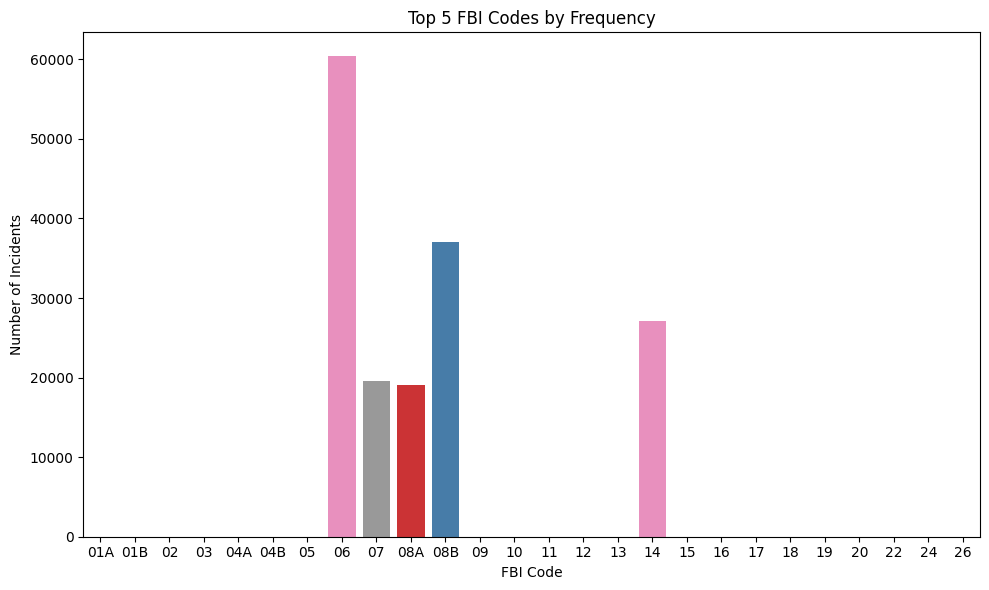

In [13]:
plt.figure(figsize=(10, 6))
fbi = crimes['FBI Code'].value_counts().head(5)
sns.barplot(data=fbi.reset_index(), x='FBI Code', y='count', palette='Set1')
plt.title('Top 5 FBI Codes by Frequency')
plt.xlabel('FBI Code')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# INSIGHT
FBI Code 06 leads with 60,000 cases aligning with overall theft prevalence and calling for federal-level prevention strategies.
<HR></HR>

# QUESTION 11: 
# Proportion of crimes by Ward?

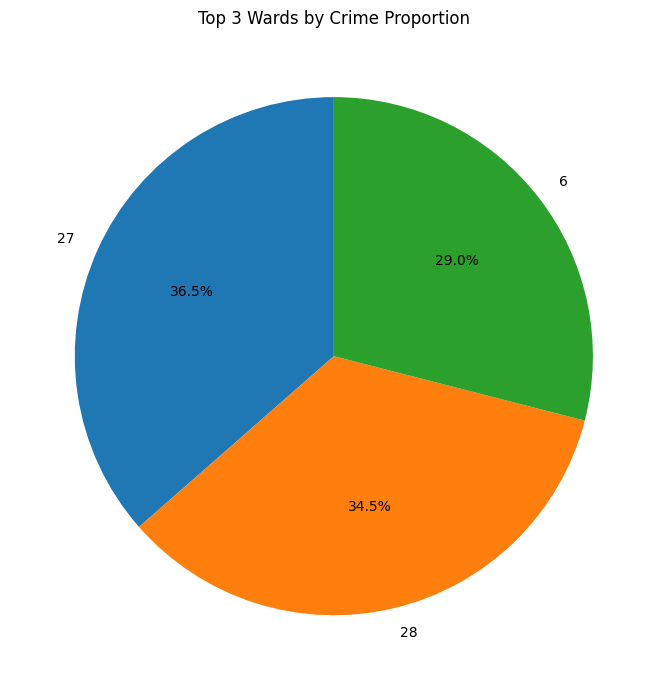

In [14]:
plt.figure(figsize=(7, 7))
ward = crimes['Ward'].value_counts().head(3)
plt.pie(ward.values, labels=ward.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Top 3 Wards by Crime Proportion')
plt.tight_layout()
plt.show()

# INSIGHT
Ward 27 holds 36.5% of crimes revealing uneven distribution that may reflect socioeconomic disparities in the area.
<HR></HR>

# QUESTION 12:
# Arrest rates for top crime types

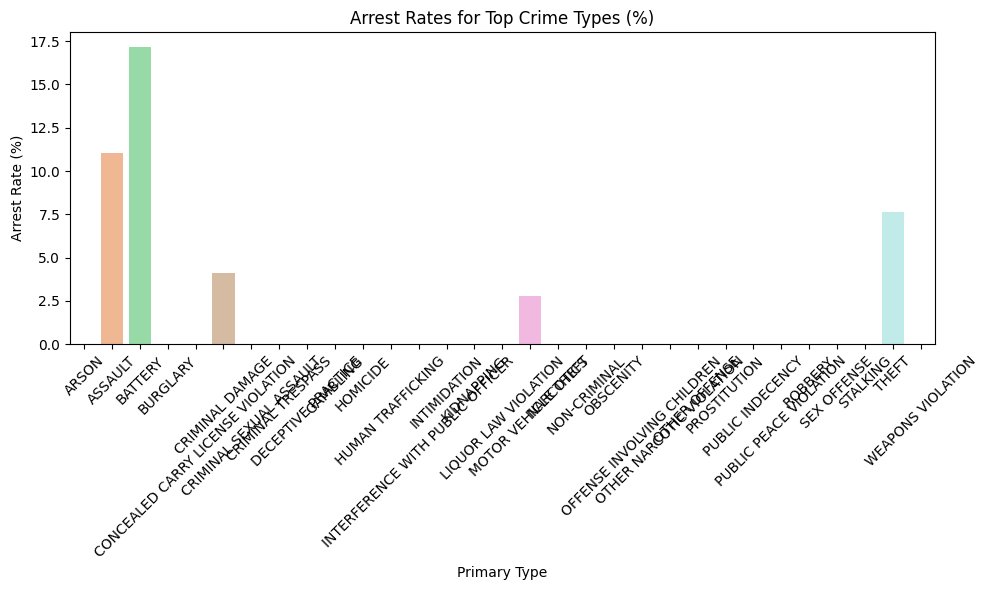

In [15]:
types = crimes['Primary Type'].value_counts().head(5).index
arrest_rates = crimes[crimes['Primary Type'].isin(types)].groupby('Primary Type')['Arrest'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=arrest_rates.index, y=arrest_rates.values, palette='pastel')
plt.title('Arrest Rates for Top Crime Types (%)')
plt.xlabel('Primary Type')
plt.ylabel('Arrest Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INSIGHT:
BATTERY has the highest arrest rate at 16% likely due to visible evidence and witness involvement compared to others.
<HR></HR>

# QUESTION 13:
# Top descriptions for MOTOR VEHICLE THEFT?

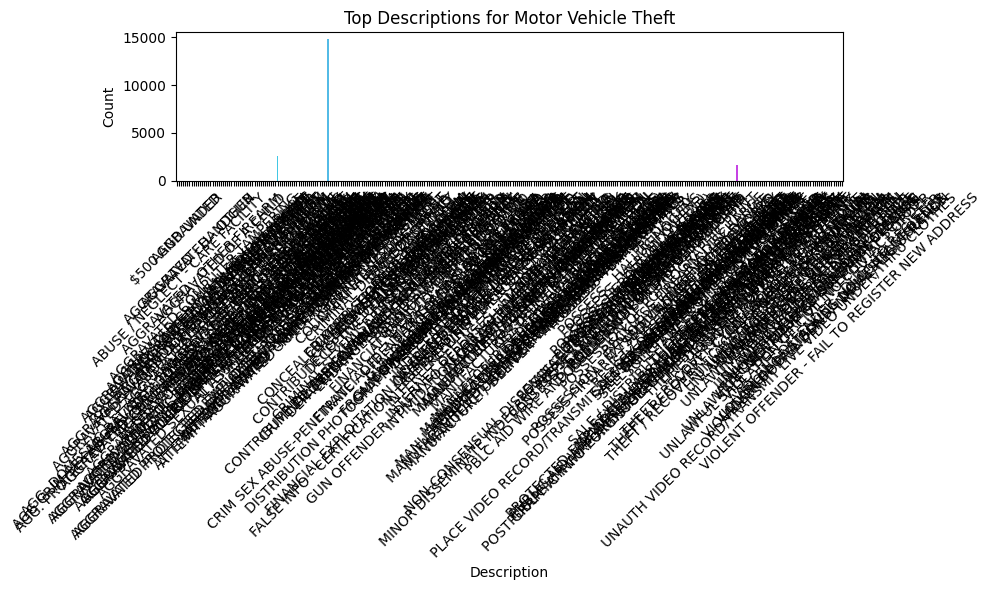

In [16]:
mvt = crimes[crimes['Primary Type'] == 'MOTOR VEHICLE THEFT']
description = mvt['Description'].value_counts().head(3)
plt.figure(figsize=(10, 6))
sns.barplot(data=description.reset_index(), x='Description', y='count', palette='cool')
plt.title('Top Descriptions for Motor Vehicle Theft')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INSIGHT:
Automobiles are targeted in 14,000+ cases, therefore I recommend anti-theft tech like GPS trackers for vehicles.
<HR></HR>

# QUESTION 14:
# Bubble chart for community areas by crime count and arrest rate

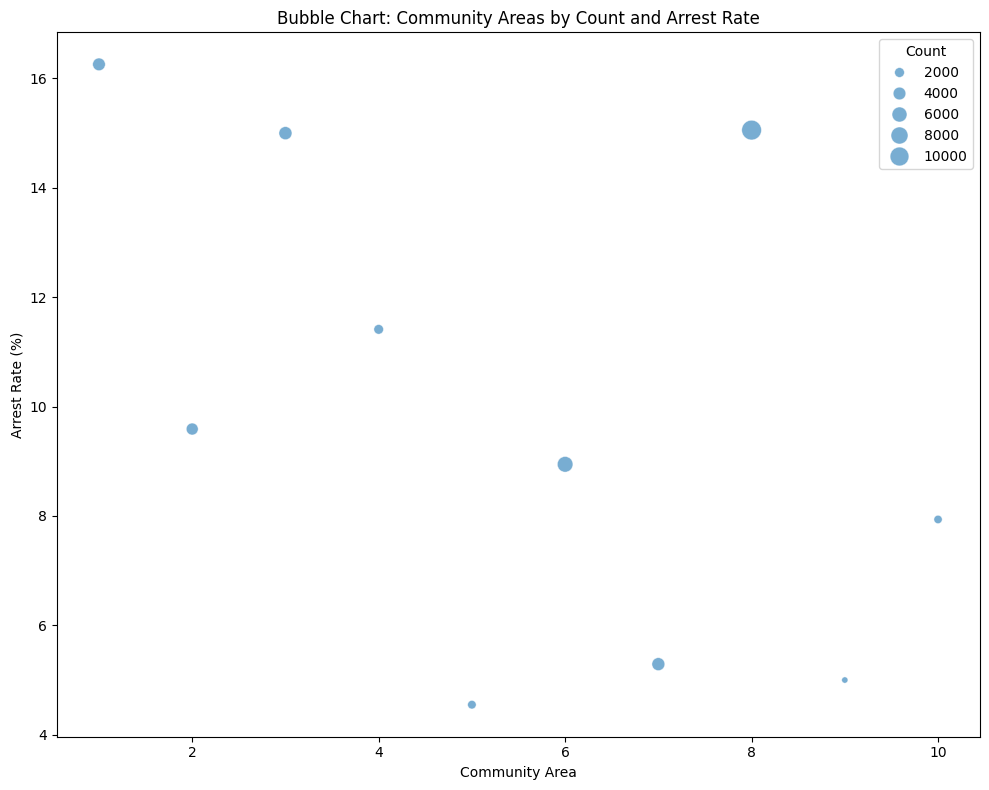

In [17]:
ca = crimes.groupby('Community Area').agg({'Primary Type': 'count', 'Arrest': 'mean'}).reset_index()
ca.columns = ['Community Area', 'Count', 'Arrest Rate']
ca['Arrest Rate'] *= 100
plt.figure(figsize=(10, 8))
sns.scatterplot(data=ca.head(10), x='Community Area', y='Arrest Rate', size='Count', sizes=(20, 200), alpha=0.6)
plt.title('Bubble Chart: Community Areas by Count and Arrest Rate')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rate (%)')
plt.tight_layout()
plt.show()

# INSIGHT:
Larger bubbles in high-crime areas like 8 show low arrest rates, pointing to enforcement gaps.
<HR></HR>

# QUESTION 15:
# Pie chart of crimes by Beat

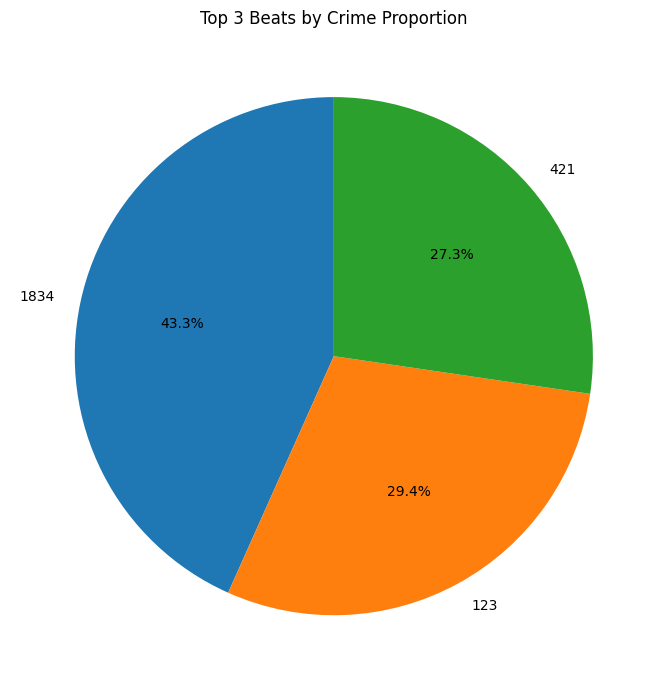

In [18]:
beats = crimes['Beat'].value_counts().head(3)
plt.figure(figsize=(7, 7))
plt.pie(beats.values, labels=beats.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Top 3 Beats by Crime Proportion')
plt.tight_layout()
plt.show()

# INSIGHT:
Beat 1834 covers 43.3% of incidents, suggesting patrol concentration could yield efficiency gains.
<HR></HR>

# QUESTION 16:
# Weapons violation counts by year?

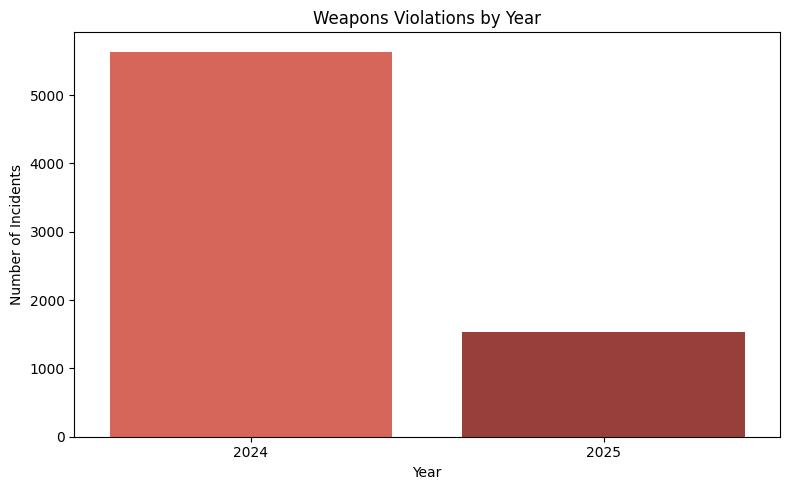

In [19]:
wv = crimes[crimes['Primary Type'] == 'WEAPONS VIOLATION']
plt.figure(figsize=(8, 5))
year_wv = wv['Year'].value_counts().sort_index()
sns.barplot(x=year_wv.index, y=year_wv.values, palette='Reds_d')
plt.title('Weapons Violations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# INSIGHT:
A sharp drop from 5,000+ to 1,500 weapons cases in 2025 may reflect successful gun control initiatives.
<HR></HR>

# QUESTION 17:
# What is the distribution of crimes by FBI Code category in the dataset?

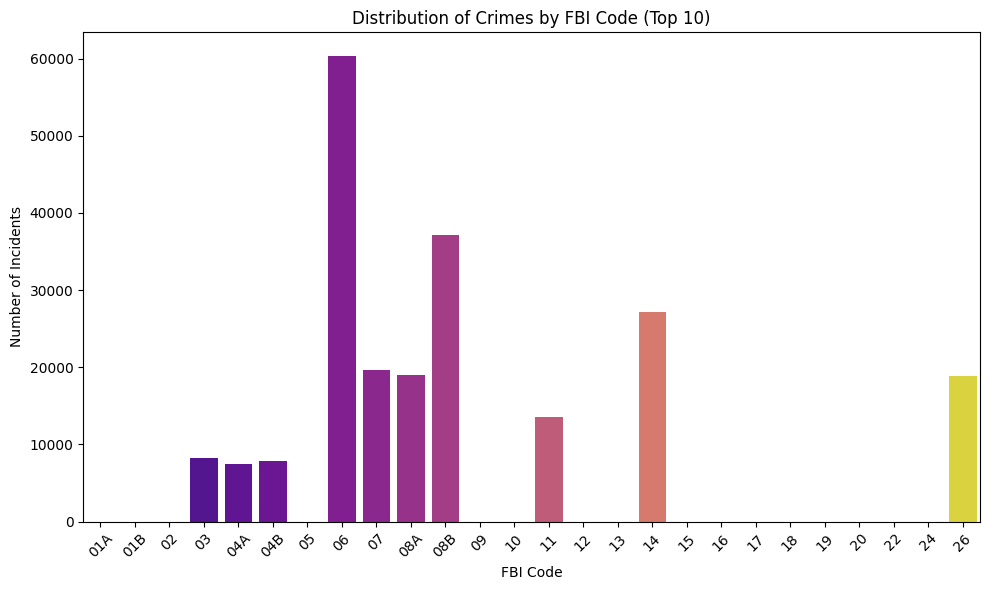

In [20]:
plt.figure(figsize=(10, 6))
fbi = crimes['FBI Code'].value_counts().head(10)
sns.barplot(data=fbi.reset_index(), x='FBI Code', y='count', palette='plasma')
plt.title('Distribution of Crimes by FBI Code (Top 10)')
plt.xlabel('FBI Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INSIGHT:
The FBI Code '06' overwhelmingly dominates the distribution with the highest count among the top 10 codes, representing a significant portion of reported incidents in the Chicago crimes dataset. Policymakers could leverage this insight to allocate budgets towards theft prevention technologies, such as improved surveillance in commercial districts, while simultaneously enhancing victim support services for the more traumatic violent offenses to foster a balanced approach to public safety.
<HR></HR>

# QUESTION 18:
# How does the arrest rate vary across different community areas?

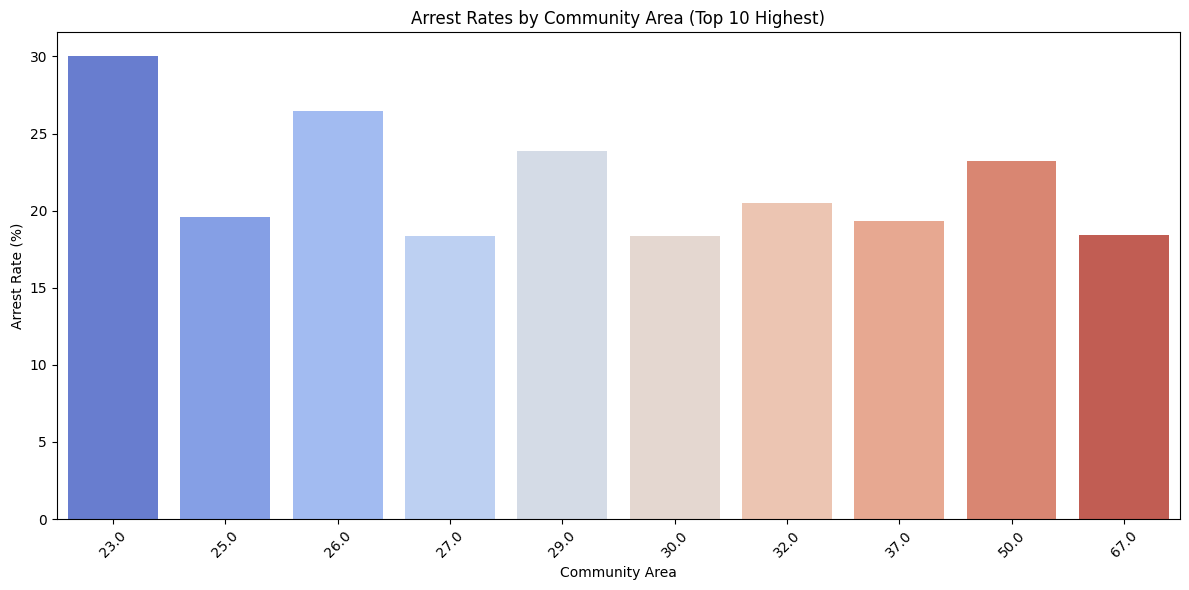

In [21]:
ca = crimes.groupby('Community Area')['Arrest'].mean() * 100
ca = ca.dropna().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=ca.index, y=ca.values, palette='coolwarm')
plt.title('Arrest Rates by Community Area (Top 10 Highest)')
plt.xlabel('Community Area')
plt.ylabel('Arrest Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INSIGHT:
Higher arrest rates in select community areas likely stem from better infrastructure and policing presence. This disparity underscores inequities with underserved zones facing underreporting and delays.
<HR></HR>

# QUESTION 19:
# How do total crime counts vary by year?

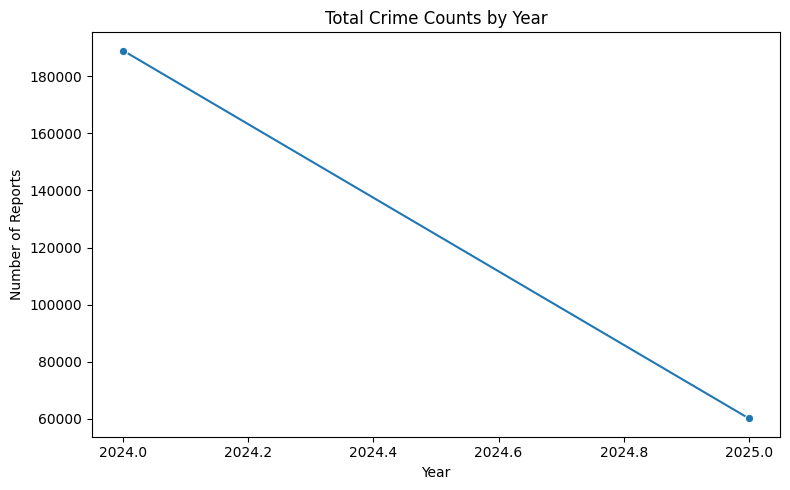

In [22]:
yearly_counts = crimes.groupby('Year').size()
plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Total Crime Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()

# INSIGHT:
There are clear year-to-year variations in total criminal reports, revealing trends in public safety and enforcement
<HR></HR>

# QUESTION 20:
# Which wards have the highest concentration of motor vehicle thefts?

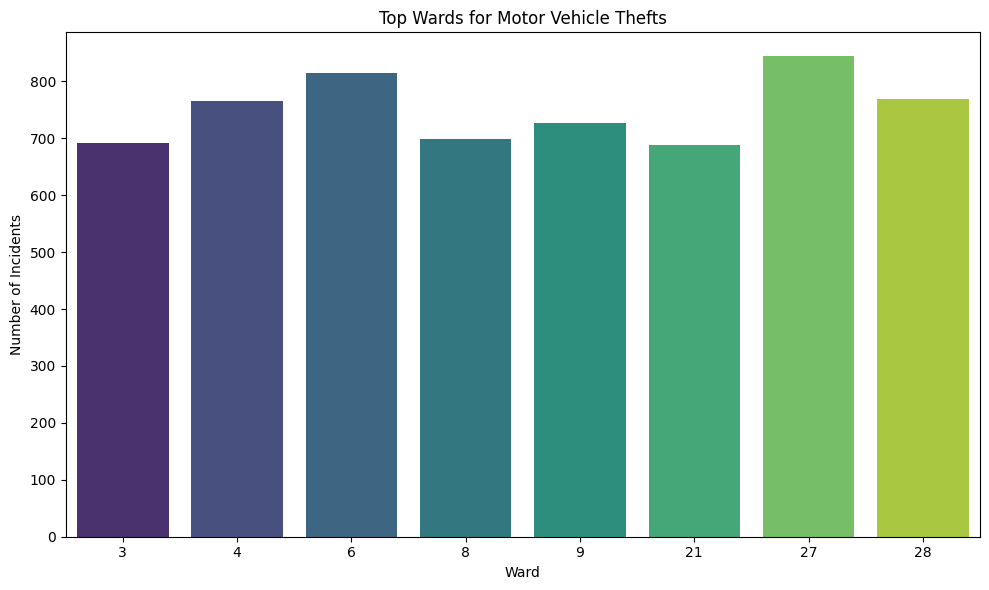

In [23]:
mvt = crimes[crimes['Primary Type'] == 'MOTOR VEHICLE THEFT']['Ward'].value_counts().head(8)
plt.figure(figsize=(10, 6))
sns.barplot(data=mvt.reset_index(), x='Ward', y='count', palette='viridis')
plt.title('Top Wards for Motor Vehicle Thefts')
plt.xlabel('Ward')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

# INSIGHT:

<HR></HR>

# QUESTION 21:
# Top 5 descriptions for battery incidents?

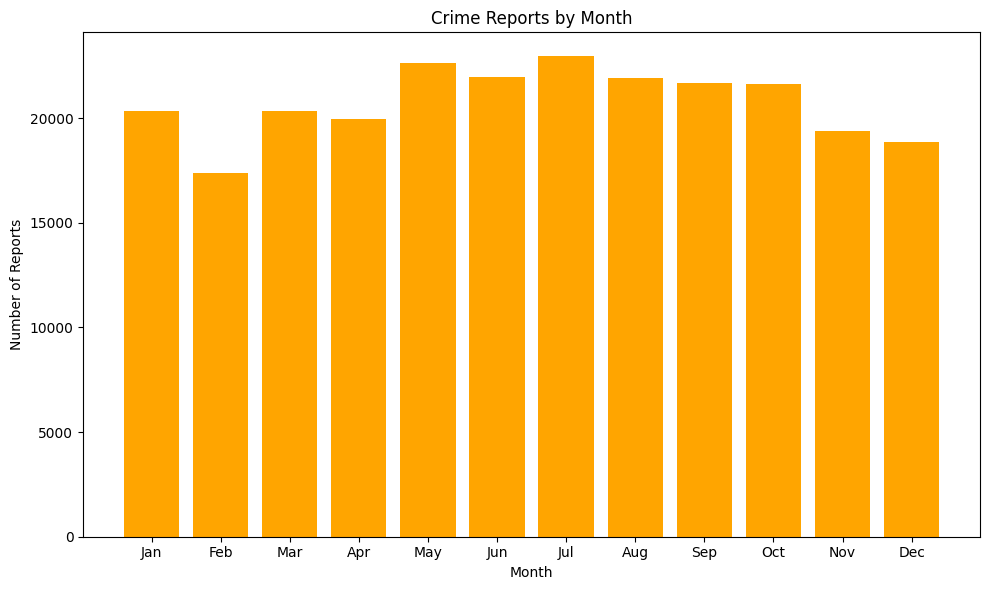

In [32]:
monthly_counts = crimes['Month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(monthly_counts.index.astype(str), monthly_counts.values, color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Reports')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Crime Reports by Month')
plt.tight_layout()
plt.show()

# INSIGHT:

<HR></HR>

# QUESTION 22:
# Pie chart for proportion of arrests in top districts?

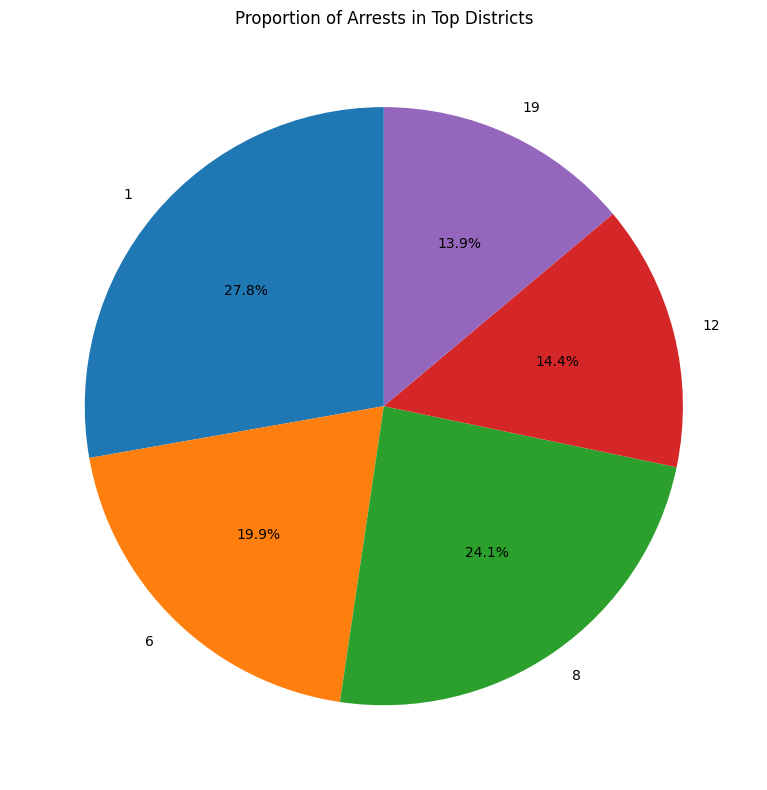

In [25]:
top_districts = crimes['District'].value_counts().head(5).index
arrest_dist = crimes[crimes['District'].isin(top_districts)].groupby('District')['Arrest'].sum()
total_arrests = arrest_dist.sum()
arrest_pct = (arrest_dist / total_arrests * 100).round(1)
plt.figure(figsize=(8, 8))
plt.pie(arrest_pct.values, labels=arrest_pct.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Arrests in Top Districts')
plt.tight_layout()
plt.show()

# INSIGHT:

<HR></HR>

# QUESTION 24:
# Heatmap of crimes by district and month

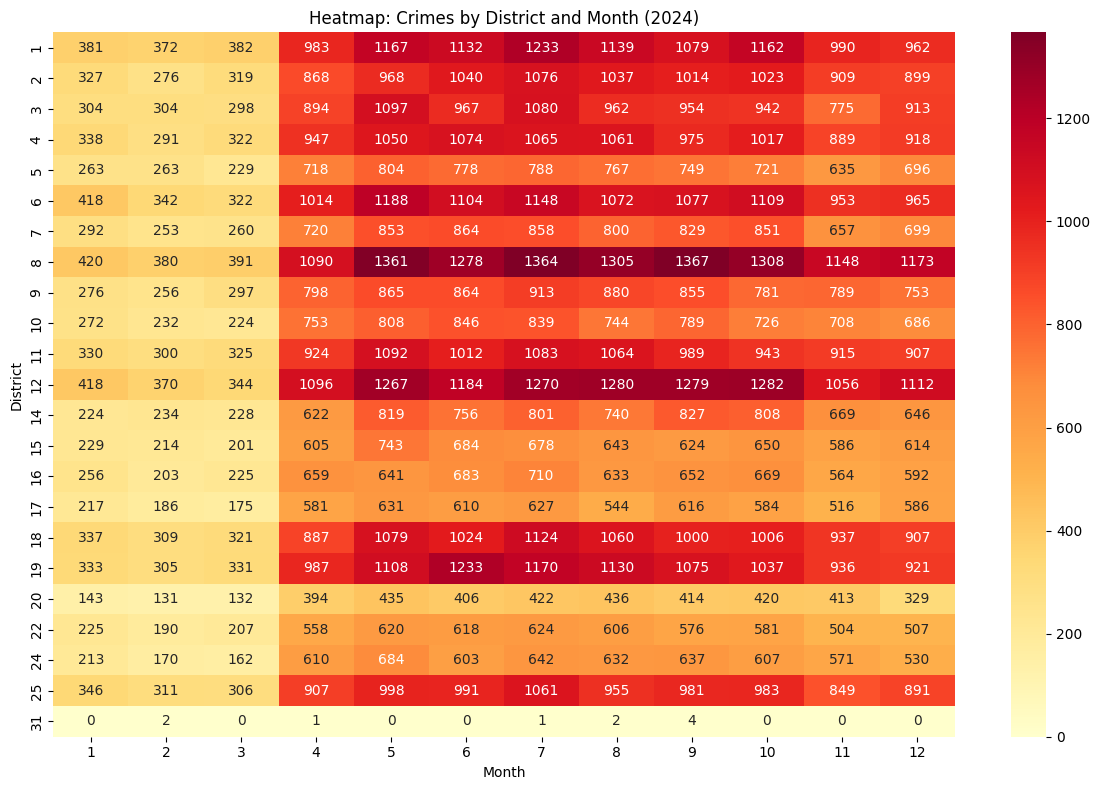

In [27]:
crimes_2024 = crimes[crimes['Year'] == 2024]
pivot_dm = crimes_2024.pivot_table(index='District', columns='Month', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_dm, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap: Crimes by District and Month (2024)')
plt.xlabel('Month')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# INSIGHT:

<HR></HR>

# QUESTION 25:
# 

# INSIGHT:

<HR></HR>

# QUESTION 26:
# 

# INSIGHT:

<HR></HR>

# QUESTION 27:
# 

# INSIGHT:

<HR></HR>

# QUESTION 28:
# 

# INSIGHT:

<HR></HR>

# QUESTION 29:
# 

# INSIGHT:

<HR></HR>

# QUESTION 30:
# 

# INSIGHT:

<HR></HR>

# QUESTION 31:
# 

# INSIGHT:

<HR></HR>

# QUESTION 32:
# 

# INSIGHT:

<HR></HR>

# QUESTION 33:
# 

# INSIGHT:

<HR></HR>

# QUESTION 34:
# 

# INSIGHT:

<HR></HR>

# QUESTION 35:
# 

# INSIGHT:

<HR></HR>